# BY: Mohamed Ashraf Gaber

## The Data.

### Breast cancer wisconsin (diagnostic) dataset.

### This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2.
### This is a model which predict if the person has cancer or not (Malignant or Benign).

## Importing libraries I will need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

## Importing the data.

In [2]:
data = pd.read_csv('cancer_classification.csv')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Some exploratory data analysis and data visualization.

In [3]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Here there isn't a null value.

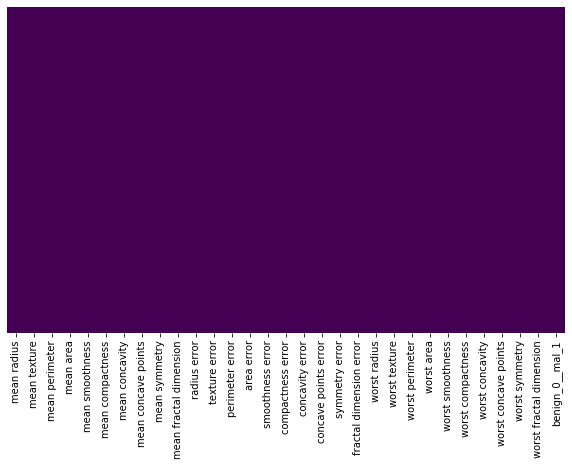

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

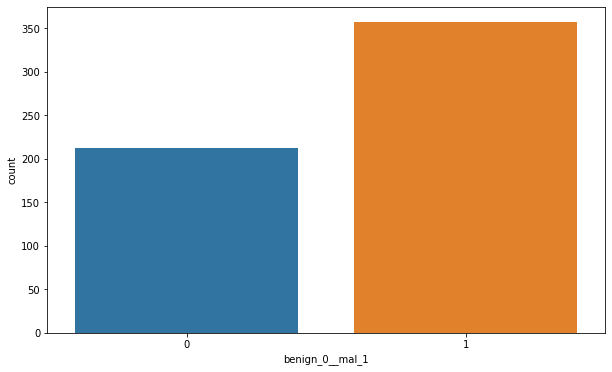

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot('benign_0__mal_1', data=data)

### Geting the correlation between features and the label (benign_0__mal_1).

In [7]:
data.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

### Visualizing the correlation.

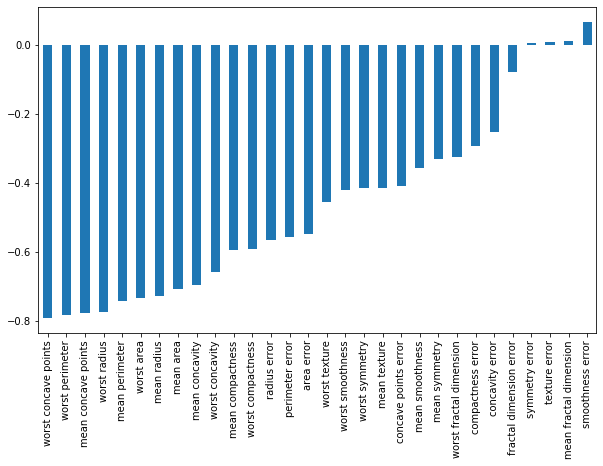

In [8]:
plt.figure(figsize=(10, 6))
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

### Setting the features to variable X.
### Setting the label to variable y.

In [9]:
X = data.drop('benign_0__mal_1', axis=1).values
y = data['benign_0__mal_1'].values

### Splitting the data into a training set and testing set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Scaling the data using StandardScaler.

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### The shape of the X_train is (426, 30) so the first layer in the neuron network will have 30 neurons.

In [12]:
X_train_scaled.shape

(426, 30)

### Building the model.

In [13]:
model = Sequential()

model.add(Dense(30, activation='relu'))  # The first layer will have 30 neurons and the activation will be relu.

model.add(Dense(15, activation='relu'))  # The hidden layer will have 15 neurons and the activation will be relu.

model.add(Dense(1, activation='sigmoid'))  # The output layer will have 1 neuron and the activation will be sigmoid.

model.compile(loss='binary_crossentropy', optimizer='adam')  # For a binary classification problem.

## Fitting the model.

In [14]:
model.fit(x=X_train_scaled, y=y_train,
          epochs=600, validation_data=(X_test_scaled, y_test),
         verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.4752 - val_loss: 0.3210
Epoch 2/600
426/426 [==============================] - 0s 75us/sample - loss: 0.3312 - val_loss: 0.2379
Epoch 3/600
426/426 [==============================] - 0s 68us/sample - loss: 0.2591 - val_loss: 0.1878
Epoch 4/600
426/426 [==============================] - 0s 89us/sample - loss: 0.2150 - val_loss: 0.1558
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.1848 - val_loss: 0.1337
Epoch 6/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1607 - val_loss: 0.1174
Epoch 7/600
426/426 [==============================] - 0s 56us/sample - loss: 0.1420 - val_loss: 0.1055
Epoch 8/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1267 - val_loss: 0.0965
Epoch 9/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1143 - val_loss: 0.0884
Epoch 10/600
426/42

426/426 [==============================] - 0s 61us/sample - loss: 0.0068 - val_loss: 0.1079
Epoch 79/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0063 - val_loss: 0.1088
Epoch 80/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0062 - val_loss: 0.1092
Epoch 81/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0059 - val_loss: 0.1106
Epoch 82/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0057 - val_loss: 0.1130
Epoch 83/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0055 - val_loss: 0.1129
Epoch 84/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0055 - val_loss: 0.1153
Epoch 85/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0052 - val_loss: 0.1143
Epoch 86/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0050 - val_loss: 0.1164
Epoch 87/600
426/426 [==============================] - 0s 54us/samp

426/426 [==============================] - 0s 56us/sample - loss: 8.7873e-04 - val_loss: 0.1999
Epoch 156/600
426/426 [==============================] - 0s 54us/sample - loss: 8.6653e-04 - val_loss: 0.2010
Epoch 157/600
426/426 [==============================] - 0s 54us/sample - loss: 8.5433e-04 - val_loss: 0.2011
Epoch 158/600
426/426 [==============================] - 0s 54us/sample - loss: 8.2411e-04 - val_loss: 0.2019
Epoch 159/600
426/426 [==============================] - 0s 54us/sample - loss: 8.1022e-04 - val_loss: 0.2034
Epoch 160/600
426/426 [==============================] - 0s 54us/sample - loss: 8.0690e-04 - val_loss: 0.2044
Epoch 161/600
426/426 [==============================] - 0s 54us/sample - loss: 7.9285e-04 - val_loss: 0.2052
Epoch 162/600
426/426 [==============================] - 0s 54us/sample - loss: 8.1479e-04 - val_loss: 0.2060
Epoch 163/600
426/426 [==============================] - 0s 54us/sample - loss: 7.6137e-04 - val_loss: 0.2077
Epoch 164/600
426/426 [=

426/426 [==============================] - 0s 56us/sample - loss: 2.5023e-04 - val_loss: 0.2553
Epoch 230/600
426/426 [==============================] - 0s 59us/sample - loss: 2.4918e-04 - val_loss: 0.2582
Epoch 231/600
426/426 [==============================] - 0s 56us/sample - loss: 2.4987e-04 - val_loss: 0.2589
Epoch 232/600
426/426 [==============================] - 0s 56us/sample - loss: 2.4687e-04 - val_loss: 0.2587
Epoch 233/600
426/426 [==============================] - 0s 56us/sample - loss: 2.3861e-04 - val_loss: 0.2599
Epoch 234/600
426/426 [==============================] - 0s 53us/sample - loss: 2.3490e-04 - val_loss: 0.2605
Epoch 235/600
426/426 [==============================] - 0s 56us/sample - loss: 2.4377e-04 - val_loss: 0.2628
Epoch 236/600
426/426 [==============================] - 0s 59us/sample - loss: 2.3662e-04 - val_loss: 0.2626
Epoch 237/600
426/426 [==============================] - 0s 58us/sample - loss: 2.2380e-04 - val_loss: 0.2628
Epoch 238/600
426/426 [=

426/426 [==============================] - 0s 52us/sample - loss: 1.0046e-04 - val_loss: 0.3012
Epoch 304/600
426/426 [==============================] - 0s 54us/sample - loss: 1.0090e-04 - val_loss: 0.3015
Epoch 305/600
426/426 [==============================] - 0s 54us/sample - loss: 9.9652e-05 - val_loss: 0.3008
Epoch 306/600
426/426 [==============================] - 0s 52us/sample - loss: 9.9155e-05 - val_loss: 0.3009
Epoch 307/600
426/426 [==============================] - 0s 52us/sample - loss: 9.8274e-05 - val_loss: 0.3016
Epoch 308/600
426/426 [==============================] - 0s 52us/sample - loss: 9.5907e-05 - val_loss: 0.3024
Epoch 309/600
426/426 [==============================] - 0s 53us/sample - loss: 9.4273e-05 - val_loss: 0.3027
Epoch 310/600
426/426 [==============================] - 0s 54us/sample - loss: 9.3229e-05 - val_loss: 0.3034
Epoch 311/600
426/426 [==============================] - 0s 53us/sample - loss: 9.2012e-05 - val_loss: 0.3042
Epoch 312/600
426/426 [=

426/426 [==============================] - 0s 57us/sample - loss: 4.6031e-05 - val_loss: 0.3362
Epoch 378/600
426/426 [==============================] - 0s 59us/sample - loss: 4.5985e-05 - val_loss: 0.3372
Epoch 379/600
426/426 [==============================] - 0s 55us/sample - loss: 4.5379e-05 - val_loss: 0.3371
Epoch 380/600
426/426 [==============================] - 0s 56us/sample - loss: 4.5942e-05 - val_loss: 0.3378
Epoch 381/600
426/426 [==============================] - 0s 55us/sample - loss: 4.5247e-05 - val_loss: 0.3376
Epoch 382/600
426/426 [==============================] - 0s 55us/sample - loss: 4.4428e-05 - val_loss: 0.3389
Epoch 383/600
426/426 [==============================] - 0s 56us/sample - loss: 4.3791e-05 - val_loss: 0.3388
Epoch 384/600
426/426 [==============================] - 0s 56us/sample - loss: 4.3244e-05 - val_loss: 0.3393
Epoch 385/600
426/426 [==============================] - 0s 54us/sample - loss: 4.3232e-05 - val_loss: 0.3404
Epoch 386/600
426/426 [=

426/426 [==============================] - 0s 63us/sample - loss: 2.2513e-05 - val_loss: 0.3700
Epoch 452/600
426/426 [==============================] - 0s 61us/sample - loss: 2.2377e-05 - val_loss: 0.3706
Epoch 453/600
426/426 [==============================] - 0s 61us/sample - loss: 2.2105e-05 - val_loss: 0.3711
Epoch 454/600
426/426 [==============================] - 0s 61us/sample - loss: 2.2108e-05 - val_loss: 0.3713
Epoch 455/600
426/426 [==============================] - 0s 63us/sample - loss: 2.1806e-05 - val_loss: 0.3714
Epoch 456/600
426/426 [==============================] - 0s 59us/sample - loss: 2.1565e-05 - val_loss: 0.3721
Epoch 457/600
426/426 [==============================] - 0s 59us/sample - loss: 2.1364e-05 - val_loss: 0.3725
Epoch 458/600
426/426 [==============================] - 0s 56us/sample - loss: 2.1211e-05 - val_loss: 0.3733
Epoch 459/600
426/426 [==============================] - 0s 61us/sample - loss: 2.1134e-05 - val_loss: 0.3737
Epoch 460/600
426/426 [=

426/426 [==============================] - 0s 59us/sample - loss: 1.1518e-05 - val_loss: 0.4022
Epoch 526/600
426/426 [==============================] - 0s 61us/sample - loss: 1.1746e-05 - val_loss: 0.4053
Epoch 527/600
426/426 [==============================] - 0s 54us/sample - loss: 1.1623e-05 - val_loss: 0.4055
Epoch 528/600
426/426 [==============================] - 0s 56us/sample - loss: 1.1178e-05 - val_loss: 0.4054
Epoch 529/600
426/426 [==============================] - 0s 54us/sample - loss: 1.1089e-05 - val_loss: 0.4056
Epoch 530/600
426/426 [==============================] - 0s 66us/sample - loss: 1.1028e-05 - val_loss: 0.4055
Epoch 531/600
426/426 [==============================] - 0s 54us/sample - loss: 1.0888e-05 - val_loss: 0.4058
Epoch 532/600
426/426 [==============================] - 0s 59us/sample - loss: 1.0661e-05 - val_loss: 0.4065
Epoch 533/600
426/426 [==============================] - 0s 56us/sample - loss: 1.0620e-05 - val_loss: 0.4069
Epoch 534/600
426/426 [=

426/426 [==============================] - 0s 56us/sample - loss: 5.9211e-06 - val_loss: 0.4349
Epoch 600/600
426/426 [==============================] - 0s 56us/sample - loss: 5.8983e-06 - val_loss: 0.4349


## Visualizing the loss for the training and testing sets.
### It's clear that the model is badly overfitting.

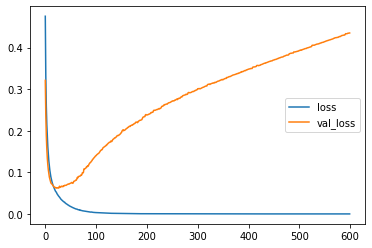

In [15]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### I'll use early stopping to track val_loss and stop training once it begins to increase too much.

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

### Creating and fitting the model again.

In [17]:
model = Sequential()

model.add(Dense(30, activation='relu'))  # The first layer will have 30 neurons and the activation will be relu.

model.add(Dense(15, activation='relu'))  # The hidden layer will have 15 neurons and the activation will be relu.

model.add(Dense(1, activation='sigmoid'))  # The output layer will have 1 neuron and the activation will be sigmoid.

model.compile(loss='binary_crossentropy', optimizer='adam')  # For a binary classification problem.

In [18]:
model.fit(x=X_train_scaled, y=y_train, epochs=600,
         verbose=1, validation_data=(X_test_scaled, y_test),
         callbacks=[early_stopping])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.8337 - val_loss: 0.6171
Epoch 2/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4993 - val_loss: 0.3840
Epoch 3/600
426/426 [==============================] - 0s 66us/sample - loss: 0.3382 - val_loss: 0.2657
Epoch 4/600
426/426 [==============================] - 0s 65us/sample - loss: 0.2478 - val_loss: 0.1996
Epoch 5/600
426/426 [==============================] - 0s 62us/sample - loss: 0.1946 - val_loss: 0.1581
Epoch 6/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1613 - val_loss: 0.1303
Epoch 7/600
426/426 [==============================] - 0s 61us/sample - loss: 0.1383 - val_loss: 0.1104
Epoch 8/600
426/426 [==============================] - 0s 66us/sample - loss: 0.1211 - val_loss: 0.0977
Epoch 9/600
426/426 [==============================] - 0s 56us/sample - loss: 0.1086 - val_loss: 0.0873
Epoch 10/600
426/42

### Visualizing the loss again.
### And the model is still overfitting.

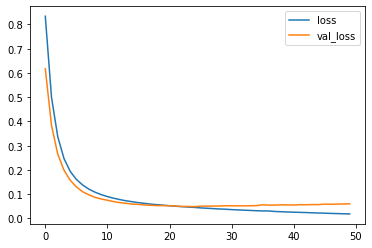

In [19]:
losses = pd.DataFrame(model.history.history)

losses.plot()

### Now I'll add DropOut Layers.
### Creating and fitting the model again.

In [20]:
model = Sequential()

model.add(Dense(30, activation='relu'))  # The first layer will have 30 neurons and the activation will be relu.
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))  # The hidden layer will have 15 neurons and the activation will be relu.
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # The output layer will have 1 neuron and the activation will be sigmoid.

model.compile(loss='binary_crossentropy', optimizer='adam')  # For a binary classification problem.

In [21]:
model.fit(x=X_train_scaled, y=y_train, epochs=600,
         validation_data=(X_test_scaled, y_test), verbose=1,
         callbacks=[early_stopping])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 1.0844 - val_loss: 0.8276
Epoch 2/600
426/426 [==============================] - 0s 70us/sample - loss: 0.8302 - val_loss: 0.6493
Epoch 3/600
426/426 [==============================] - 0s 66us/sample - loss: 0.7270 - val_loss: 0.5410
Epoch 4/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6291 - val_loss: 0.4601
Epoch 5/600
426/426 [==============================] - 0s 66us/sample - loss: 0.5622 - val_loss: 0.3977
Epoch 6/600
426/426 [==============================] - 0s 71us/sample - loss: 0.5266 - val_loss: 0.3444
Epoch 7/600
426/426 [==============================] - 0s 60us/sample - loss: 0.4611 - val_loss: 0.3043
Epoch 8/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4248 - val_loss: 0.2663
Epoch 9/600
426/426 [==============================] - 0s 65us/sample - loss: 0.4351 - val_loss: 0.2329
Epoch 10/600
426/42

426/426 [==============================] - 0s 68us/sample - loss: 0.0784 - val_loss: 0.0430
Epoch 79/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0822 - val_loss: 0.0429
Epoch 80/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0883 - val_loss: 0.0418
Epoch 00080: early stopping


### Visualizing the loss again.
### And now the model is pretty good and there isn't overfitting.

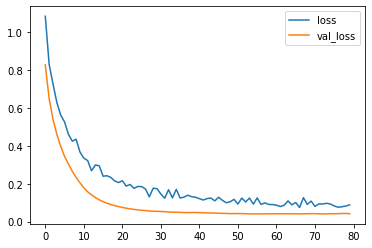

In [22]:
losses = pd.DataFrame(model.history.history)

losses.plot()

## Getting the prediction.

In [23]:
prediction = model.predict_classes(X_test_scaled)

## Evaluating the model.
## And we get an amazing accuracy 99%.

In [24]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[53  1]
 [ 0 89]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

